In [ ]:
import numpy as np
from cv2 import cv2
from matplotlib import pyplot as plt

In [ ]:
img1 = cv2.imread("image.jpg", 0)
img2 = cv2.imread("image2.jpg", 0)

# Imagem 1

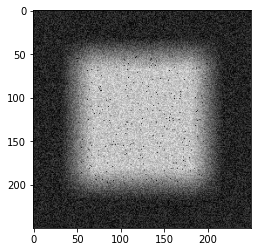

(250, 250)


In [ ]:
plt.imshow(img1, cmap="gray")
plt.show()
print(img1.shape)

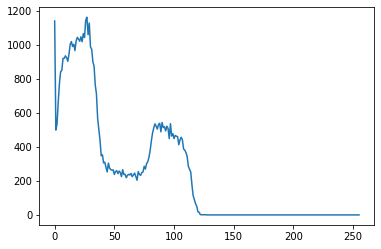

In [ ]:
histograma = cv2.calcHist([img1], [0], None, [256], [0,256]) 
plt.plot(histograma)

Histograma da imagem original

---

#### Processando a imagem
> - [ ] Executando filtragem

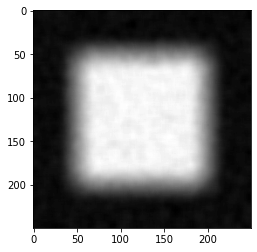

In [ ]:
img_gauss = cv2.GaussianBlur(img1, (11,11), 5)  # Aplicando filtro Gaussiano
plt.imshow(img_gauss, cmap='gray')

Resultado da imagem filtrada. 

---

#### Processando a imagem
> - [x] Executando filtragem
>
> - [ ] Analise seu histograma e identifique problemas ou limites entre objetos

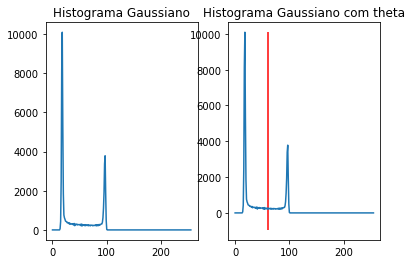

In [ ]:
histograma = cv2.calcHist([img_gauss], [0], None, [256], [0,256])
plt.subplot(1,2,1)
plt.title("Histograma Gaussiano")
plt.plot(histograma)

theta = 60
plt.subplot(1,2,2)
plt.vlines(theta, -950, histograma.max(), label=r'$ \theta $', colors='red')
plt.title("Histograma Gaussiano com theta")
plt.plot(histograma)

Histograma da imagem apos a filtragem.

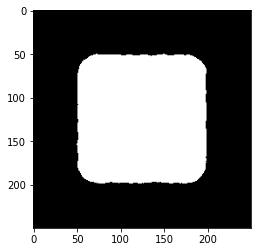

In [ ]:
_, img_binarizada = cv2.threshold(img_gauss, theta, 255, cv2.THRESH_BINARY)  # Binarizadno a imagem
plt.imshow(img_binarizada, cmap='gray')

Imagem binarizada.

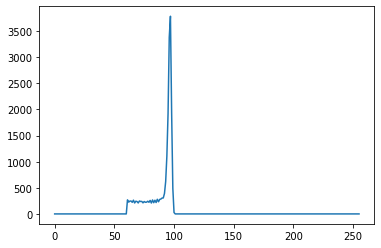

In [ ]:
histograma_binarizado = cv2.calcHist([img_gauss], [0], img_binarizada, [256], [0,256])
plt.plot(histograma_binarizado)

Histograma da imagem binarizada

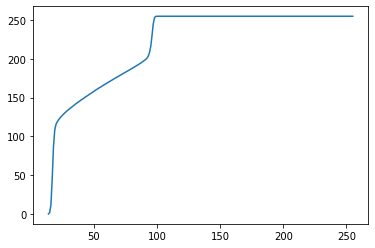

In [ ]:
cdf = histograma.cumsum()
cdf_normalized = cdf * histograma.max()/ cdf.max()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
plt.plot(cdf_m)
cdf = np.ma.filled(cdf_m,0).astype('uint8')

Aplicando equalização para ajustar o contraste.

In [ ]:
result = cdf[img_gauss]

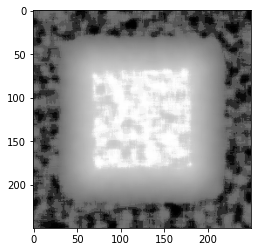

In [ ]:
plt.imshow(result, cmap='gray')

Imagem depois de aplicada a equalização para ajustar o contraste

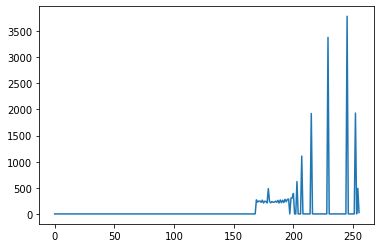

In [ ]:
histograma = cv2.calcHist([result], [0], img_binarizada, [256], [0,256])
plt.plot(histograma)

Histograma da imagem aplicada a equalização

---

## Resultando final | Imagem 1

#### Processando a imagem
> - [x] Executando filtragem
>
> - [x] Analise seu histograma e identifique problemas ou limites entre objetos

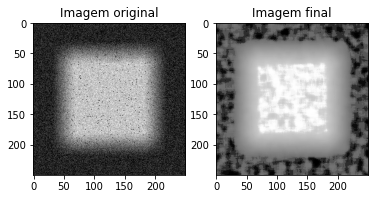

In [ ]:
plt.subplot(1,2,1)
plt.title("Imagem original")
plt.imshow(img1, cmap='gray')

plt.subplot(1,2,2)
plt.title("Imagem final")
plt.imshow(result, cmap='gray')

---

# Imagem 2

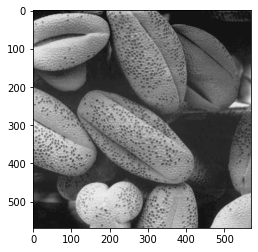

(569, 570)


In [ ]:
plt.imshow(img2, cmap="gray")
plt.show()
print(img2.shape)

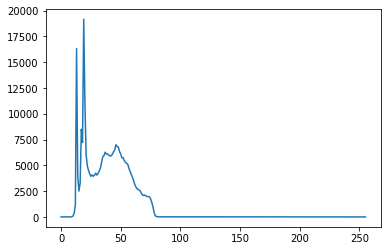

In [ ]:
histograma = cv2.calcHist([img2], [0], None, [256], [0,256])
plt.plot(histograma)

Histograma da imagem originalHistograma da imagem original

---

#### Processando a imagem
> - [ ] ~~Executando filtragem~~
>
>  - [ ] Analise seu histograma e identifique problemas ou limites entre objetos

38.0


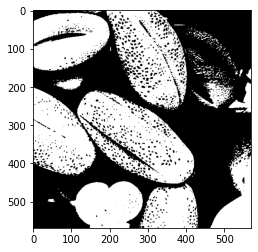

In [ ]:
_, img_binarizada = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # Utlizando Otsu's thresholding.
plt.imshow(img_binarizada, cmap='gray')
print(_)

Imagem binarizada utilizando OTSU

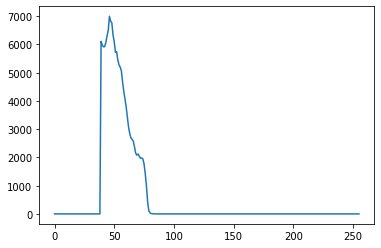

In [ ]:
histograma_binarizado2 = cv2.calcHist([img2], [0], img_binarizada, [256], [0,256])
plt.plot(histograma_binarizado2)

Histograma da imagem binarizada

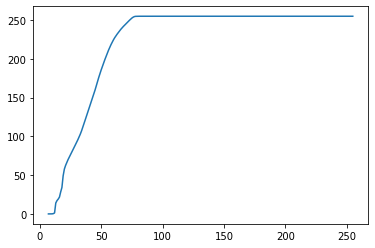

In [ ]:
cdf = histograma.cumsum()
cdf_normalized = cdf * histograma.max()/ cdf.max()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
plt.plot(cdf_m)
cdf = np.ma.filled(cdf_m,0).astype('uint8')

Aplicando equalização para ajustar o contraste.

In [ ]:
result = cdf[img2]

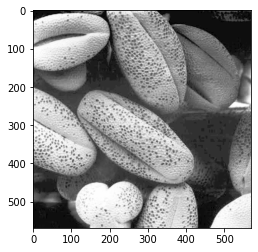

In [ ]:
plt.imshow(result, cmap='gray')

Imagem depois de aplicada a equalização para ajustar o contraste

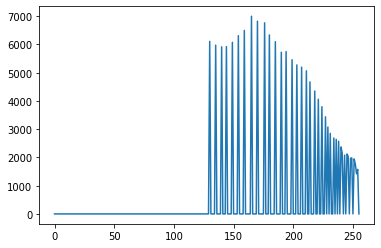

In [ ]:
result_histograma = cv2.calcHist([result], [0], img_binarizada, [256], [0,256])
plt.plot(result_histograma)

Histograma da imagem aplicada a equalização

---

## Resultando final | Imagem 2

#### Processando a imagem
> - [x] ~~Executando filtragem~~
>
> - [x] Analise seu histograma e identifique problemas ou limites entre objetos

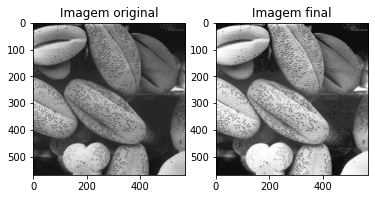

In [ ]:
plt.subplot(1,2,1)
plt.title("Imagem original")
plt.imshow(img2, cmap='gray')

plt.subplot(1,2,2)
plt.title("Imagem final")
plt.imshow(result, cmap='gray')